In [29]:
from __future__ import division # to set floating point decimal
import nltk
from urllib.request import urlopen, Request # for webpages
from nltk import bigrams
import bs4
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [161]:
headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) ' 
                      'AppleWebKit/537.11 (KHTML, like Gecko) '
                      'Chrome/23.0.1271.64 Safari/537.11',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
        'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
        'Accept-Encoding': 'none',
        'Accept-Language': 'en-US,en;q=0.8',
        'Connection': 'keep-alive'}

#read files from the web

urlCritics = "https://www.metacritic.com/tv/game-of-thrones/season-8/critic-reviews" #Game of Thrones Season 8 Reviews - Critics
responseCritics = urlopen(Request(url=urlCritics, headers=headers))
soupCritics = BeautifulSoup(responseCritics.read().decode('utf8'), "html.parser") # make the soup
for script in soupCritics(["script", "style"]):  # kill all script and style elements
    script.extract()    # rip it out
rawCritics = soupCritics.get_text() # get text
lines = (line.strip() for line in rawCritics.splitlines()) # break into lines and remove leading and trailing space on each
chunks = (phrase.strip() for line in lines for phrase in line.split("  ")) # break multi-headlines into a line each
rawCritics = '\n'.join(chunk for chunk in chunks if chunk) # drop blank lines

urlViewers = "https://www.metacritic.com/tv/game-of-thrones/season-8/user-reviews" #Game of Thrones Season 8 Reviews - Viewers
responseViewers = urlopen(Request(url=urlViewers, headers=headers))
soupViewers = BeautifulSoup(responseViewers.read().decode('utf8'), "html.parser") # make the soup
for script in soupViewers(["script", "style"]):  # kill all script and style elements
    script.extract()    # rip it out
rawViewers = soupViewers.get_text() # get text
lines = (line.strip() for line in rawViewers.splitlines()) # break into lines and remove leading and trailing space on each
chunks = (phrase.strip() for line in lines for phrase in line.split("  ")) # break multi-headlines into a line each
rawViewers = '\n'.join(chunk for chunk in chunks if chunk) # drop blank lines

In [162]:
print(type(rawCritics)) # this is string data
print(len(rawCritics)) # and it has 7,733 characters
rawCritics[:100] # shows first 100 characters - title and author \r\n are returns & line feeds

print(type(rawViewers)) # this is string data
print(len(rawViewers)) # and it has 74,597 characters
rawViewers[:100] # shows first 100 characters - title and author \r\n are returns & line feeds

<class 'str'>
7733
<class 'str'>
74597


'Read User Reviews and Submit your own for Game of Thrones Season 8 - Metacritic\nsearch...\nMovies\nBes'

In [163]:
tokensCritics = nltk.word_tokenize(rawCritics) # Create tokens (just looks for spaces in between "words")
print(type(tokensCritics)) # now we have a list of words
print(len(tokensCritics)) # we see we have 1526 tokens
print (tokensCritics[:10])

tokensViewers = nltk.word_tokenize(rawViewers) # Create tokens (just looks for spaces in between "words")
print(type(tokensViewers)) # now we have a list of words
print(len(tokensViewers)) # we see we have 15,310 tokens
print (tokensViewers[:10])

<class 'list'>
1526
['Critic', 'Reviews', 'for', 'Game', 'of', 'Thrones', 'Season', '8', '-', 'Metacritic']
<class 'list'>
15310
['Read', 'User', 'Reviews', 'and', 'Submit', 'your', 'own', 'for', 'Game', 'of']


In [164]:
textCritics = nltk.Text(tokensCritics)
textViewers = nltk.Text(tokensViewers)


# Let’s get rid of some stop words 
stopwords = nltk.corpus.stopwords.words('english')
customstopwords =["n't","seasons","users","I","It","TV", "review", "reviews", "critic", "season", "episode","All","full","Critic","Reviews","Season","Game","Thrones","read","Read",'New','new','the',"The","Show","show","Shows","shows","Series","series"]

punc = ['?','”',',','.','&','$','*',';','{','}','[',']','(',')','=','!','`','','>','+','<',':',"'s",'\’','...', '…','“','©','#','-',"\'",'!-!','—','!.!','»',"'"]
textCritics = [w for w in textCritics if w not in punc]
textCritics = [w for w in textCritics if w not in stopwords]
textCritics = [w for w in textCritics if w not in customstopwords]
textCritics = [re.sub(r'\d+', '!', str(w)) for w in textCritics if 1 == 1]
textCritics = [re.sub(r'\|+', '', str(w)) for w in textCritics if 1 == 1]
textCritics = [w for w in textCritics if w not in ['!']]

punc = ['?','”',',','.','&','$','*',';','{','}','[',']','(',')','=','!','`','','>','+','<',':',"'s",'\’','...', '…','“','©','#','-',"\'",'!-!','—','!.!','»',"'"]
textViewers = [w for w in textViewers if w not in punc]
textViewers = [w for w in textViewers if w not in stopwords]
textViewers = [w for w in textViewers if w not in customstopwords]
textViewers = [re.sub(r'\d+', '!', str(w)) for w in textViewers if 1 == 1]
textViewers = [re.sub(r'\|+', '', str(w)) for w in textViewers if 1 == 1]
textViewers = [w for w in textViewers if w not in ['!']]



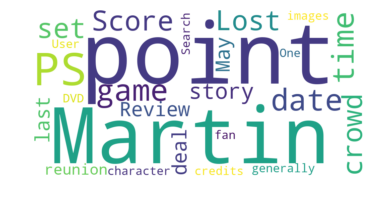

In [165]:
stopwords = set(STOPWORDS)
stopwords.update(["\'"])

x='\n'.join(map(str, list(set(textCritics))))

# Generate a word cloud image for the Critics Reviews for the top 25 words
wordcloud = WordCloud(max_words=25,width=1000,height=500,background_color="white",stopwords = stopwords).generate(x)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# Save the image in the img folder:
wordcloud.to_file("GOT_Critics_review.png")

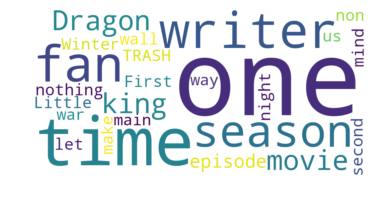

In [166]:
stopwords = set(STOPWORDS)
stopwords.update(["\'"])

x='\n'.join(map(str, list(set(textViewers))))

# Generate a word cloud image for the Critics Reviews for the top 25 words
wordcloud = WordCloud(max_words=25,width=1000,height=500,background_color="white",stopwords = stopwords).generate(x)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# Save the image in the img folder:
wordcloud.to_file("GOT_Viewers_review.png")